# Creating Heatmaps Of Canadian Network Speeds

This is a breif notebook which demonstrates how to create the network heatmaps. Most of t he heavy lifting is done in the file `scripts/heatmapPython.py`, but this demonstrates how to use the class within that file. You will however need to download two files from statistics Canada, first, the roads shapefile of network speeds which can be found [here](https://open.canada.ca/data/en/dataset/00a331db-121b-445d-b119-35dbbe3eedd9), and you'll also need the 2016 Census boundary file (however, if they release a new one, feel free to use that instead! But at this level it won't change, catostrophic environmental or political events non-withstanding). Regardless, that can be found [here](https://www12.statcan.gc.ca/census-recensement/alternative_alternatif.cfm?l=eng&dispext=zip&teng=lpr_000b16a_e.zip&k=%20%20%20%2027960&loc=http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lpr_000b16a_e.zip), where that is a zip file of the cartiographic boundary file of Canada. 

In [1]:
import sys 
sys.path.insert(1, 'scripts')
import importlib
import matplotlib.pyplot as plt
import scripts.heatmapPython as nh
import geopandas as gpd

First, we need to import those files, assuming that you unzipped the roads file to `NBD_Roads_Shapefile`, and the cartiographic boundary files to `newshape` in the same directory as this notebook. Also note that we are re-projecting the data to `espg=4326`

In [2]:
dfmap = gpd.read_file("NBD_Roads_Shapefile/NBD_ROAD_SPEEDS.shp").to_crs(epsg=4326)
dfcan = gpd.read_file("newshape/lpr_000b16a_e.shp").to_crs(epsg=4326)

First, we want to load our abstracted package below. 

In [3]:
importlib.reload(nh)

networkProcessor = nh.NetworkHeatmaps(dfcan, dfmap,
                                      save = True, 
                                      folder = 'fig/')


We then want to process our data. This is automated (assuming of course all the data loaded correctly in the cells above). However, it should be noted that this cell will likely take 30 minutes to an hour to complete. We are currently working on speeding this process up. You may encounter a few warnings during this process - and that's okay, we don't have to worry too much about those. 

In [4]:
# This takes some time to run
networkProcessor.prepData()

Calculating max speed
Converting to lat/long points
Point-Stracting
Performing Interpolation


/Users/alextennant/DS4A/CanadaSpeeds/scripts/heatmapPython.py:126: RuntimeWarning: invalid value encountered in greater
  self.zi[self.zi > 50 ] = 50


Next, if we wish to provide an underlay (for example, perhaps we want to show postal code boundaries under the map) from some shape file, we need to load and specify it. As an example, we will use the forward sortation area which can be downloaded from [Statistics Canada](https://www12.statcan.gc.ca/census-recensement/alternative_alternatif.cfm?l=eng&dispext=zip&teng=lfsa000b16a_e.zip&k=%20%20%20%2044221&loc=http://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000b16a_e.zip). Note that in the example below, the `zip` file has been extracted to a new directory `newshape` which is in the same directory as this notebook.

In [5]:
dfshape = gpd.read_file('newshape/lfsa000b16a_e.shp').to_crs(epsg=4326)


In this case, we will use New Brunswick as an example, where below we are filtering our forward sortation area to include only the polygons associated with New Brunswick

Now, we can plot our heatmap with the postal code (in this example) underlayed on the plot. In this case, we could put any valid shapefile we have access to in this figure, however, the forward sortation area is the easiest to return from Statistics Canada. We also save this to afile called `test_brunswick.png`. 

saving to test_brunswick.png


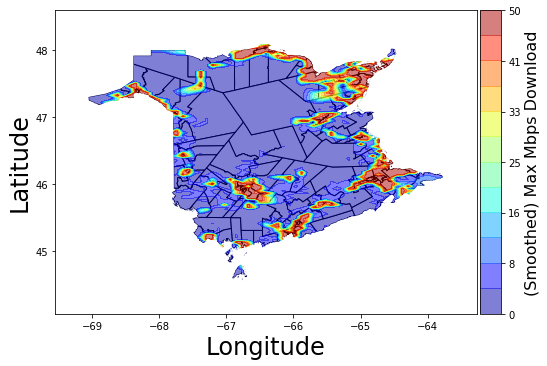

In [6]:
name = 'New Brunswick / Nouveau-Brunswick'
prov = dfshape[dfshape.PRNAME==name]
nbr = dfcan[dfcan.PRENAME=='New Brunswick']
networkProcessor.framePlot(nbr, 
                           underlay=prov,
                           figsize=(8,8), 
                           save=True, 
                           file = "test_brunswick.png")


We can also create the heatmap for all provinces and save them automatically to our `fig/` directory. 

Starting plot for Newfoundland and Labrador
saving to fig/Newfoundland and Labrador_heat.png
Starting plot for Prince Edward Island
saving to fig/Prince Edward Island_heat.png
Starting plot for Nova Scotia
saving to fig/Nova Scotia_heat.png
Starting plot for New Brunswick
saving to fig/New Brunswick_heat.png
Starting plot for Quebec
saving to fig/Quebec_heat.png
Starting plot for Ontario
saving to fig/Ontario_heat.png
Starting plot for Manitoba
saving to fig/Manitoba_heat.png
Starting plot for Saskatchewan
saving to fig/Saskatchewan_heat.png
Starting plot for Alberta
saving to fig/Alberta_heat.png
Starting plot for British Columbia
saving to fig/British Columbia_heat.png
Starting plot for Yukon
saving to fig/Yukon_heat.png
Starting plot for Northwest Territories
saving to fig/Northwest Territories_heat.png
Starting plot for Nunavut
saving to fig/Nunavut_heat.png


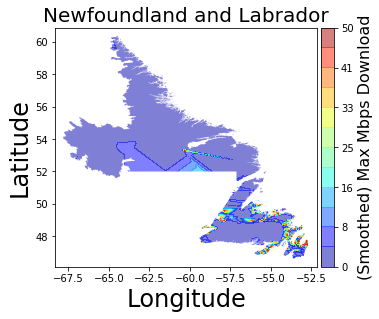

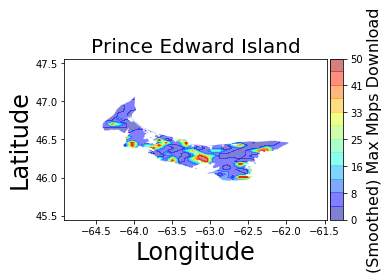

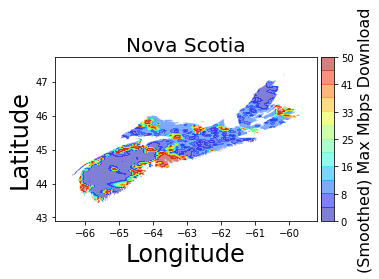

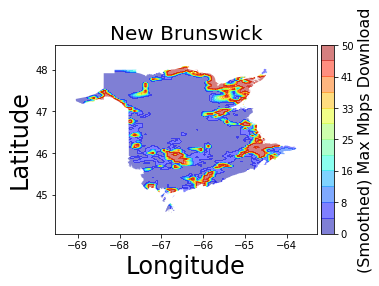

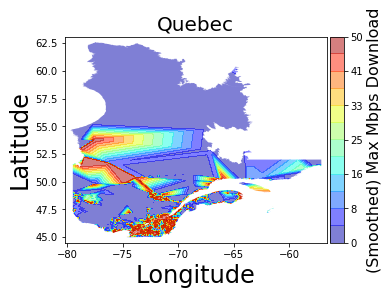

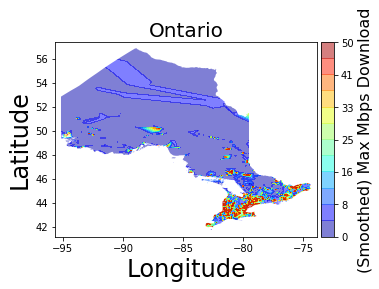

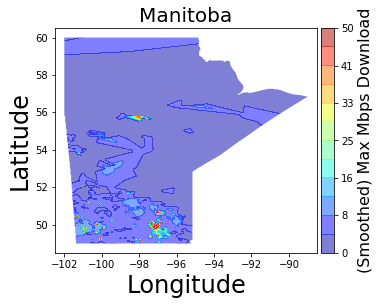

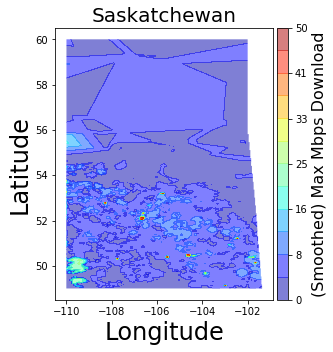

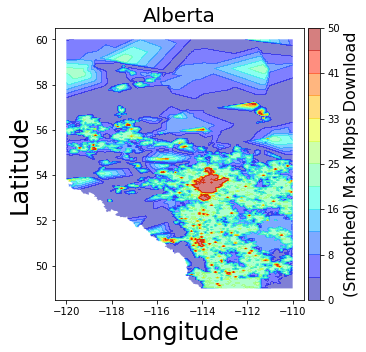

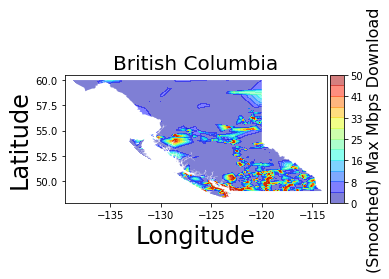

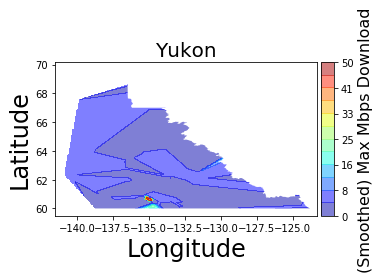

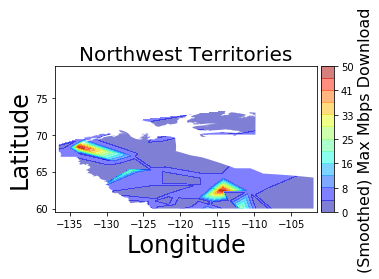

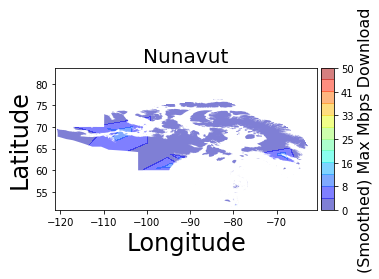

In [7]:
networkProcessor.provincePlots()